In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
import re
import string

In [ ]:
sequence_length=600
pad_symbol = "*"

In [ ]:
# Create a list of all genre tags
allGenres = []
with open("../data/hierarchy.txt") as hierarchyFile:
    for line in hierarchyFile:
        tab = line.find("\t")
        g1 = line[:tab]
        g2 = line[tab+1:len(line)-1]
        if allGenres.count(g1) == 0:
            allGenres.append(g1)
        if allGenres.count(g2) == 0:
            allGenres.append(g2)

print(allGenres[:4])

['Biography & Memoir', 'Arts & Entertainment Biographies & Memoirs', 'Political Figure Biographies & Memoirs', 'Historical Figure Biographies & Memoirs']


In [ ]:
len(allGenres)

152

In [ ]:
import pandas as pd
from pandas import DataFrame

In [ ]:
def clean(fname, sample_size):

    # Separate file into books with all metadata
    startBook = "<book"
    books = []
    with open(fname) as openFile:
        for line in openFile:
            if line[:len(startBook)] == startBook:
                books.append(line)
            else:
                books[-1] += line
    openFile.close()

    books = np.array(books)[:sample_size]

    # Collect synopses and all genre tags for each book
    # X_data found here (synopses)
    synopses = []
    genres = []

    startBody = "<body>"
    endBody = "</body>"

    startTopic = "<topics>"
    endTopic = "</topics>"

    for book in books:
        start = book.index(startBody) + len(startBody)
        end = book.index(endBody)

        blurb = book[start:end].lower()
        blurb = re.sub(r'[^\w\s]', '', blurb)

        # standardize length
        if len(blurb) > sequence_length:
            blurb = blurb[:sequence_length]
        else:
            blurb = blurb + pad_symbol*(sequence_length-len(blurb))
            
        synopses.append(blurb)

        start = book.index(startTopic) + len(startTopic)
        end = book.index(endTopic)
        genres.append(book[start:end])

    X_data = np.array(synopses)

    # Create matrix of genre tags to book
    # Y_data found here
    start = ">"
    end = "</"

    Y_data = np.zeros((len(books), len(allGenres)))

    for i in range(len(books)):
        entry = genres[i]
        while entry.find(end) != -1:
            s = entry.index(start) + 1
            e = entry.index(end)
            genreTag = entry[s:e]
            Y_data[i][allGenres.index(genreTag)] = 1
            entry = entry[e+5:]

    return (X_data, Y_data)

In [ ]:
blurb_train, genres_train = clean("../data/BlurbGenreCollection_EN_train.txt", 20000) # using fewer samples due to space limitations
blurb_test, genres_test = clean("../data/BlurbGenreCollection_EN_test.txt", 5000)
blurb_valid, genres_valid = clean("../data/BlurbGenreCollection_EN_dev.txt", 3000)

print(blurb_train[0])
print(genres_train[0])

mondays crosswords do with easetuesdays crosswords not a breezewednesdays crosswords harder stillthursdays crosswords take real skillfridays crosswords  youve come this farsaturdays crosswords  youre a starfor millions of people the new york times crossword puzzles are as essential to each day as the first cup of coffee in the morning now for the first time ever these premier puzzles are available in six clever installments with each day of the week the puzzles increase gradually in skill level mondays the easiest but saturdays sure to challenge push your mental muscles a little harder each da
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
genres_train.shape

(20000, 152)

In [ ]:
df = DataFrame(genres_train)
genreFreq = df.sum(axis=0)

In [ ]:
genreFreq

0      1296.0
1       298.0
2        69.0
3        79.0
4       128.0
        ...  
147     179.0
148      67.0
149       1.0
150     308.0
151     259.0
Length: 152, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<BarContainer object of 152 artists>

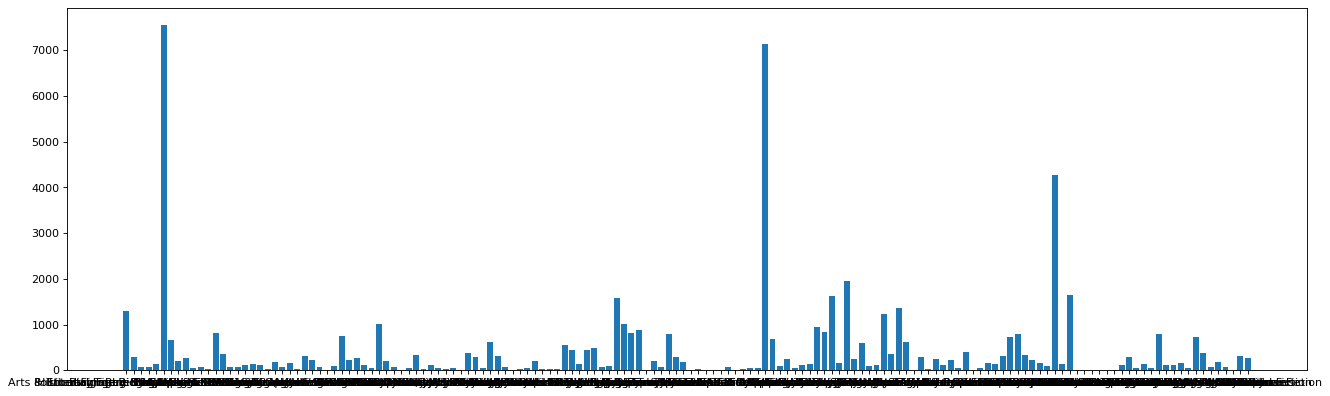

In [ ]:
figure(figsize=(20, 6), dpi=80)

plt.bar(allGenres, genreFreq)

In [ ]:
for i in genreFreq[genreFreq >= 2000].index:
  print(allGenres[i])

Nonfiction
Fiction
Children’s Books


In [ ]:
genres = []
genres_2_index = {}
index_2_genres = {}
for i in genreFreq[genreFreq >= 2000].index:
  g = allGenres[i]
  index_2_genres[i] = g
  genres_2_index[g] = i
  genres.append(g)

In [ ]:
genres

['Nonfiction', 'Fiction', 'Children’s Books']

In [ ]:
genres_2_index

{'Children’s Books': 125, 'Fiction': 86, 'Nonfiction': 5}

In [ ]:
def reduceGenres(books_y):
  Y_data = np.zeros((len(books_y), len(genres)))
  for i, book_y in enumerate(books_y):
    for j, bin_label in enumerate(book_y):
      if bin_label == 1:
        genre = index_2_genres.get(j, False)
        if genre:
          Y_data[i,genres.index(genre)] = 1
  return Y_data

In [ ]:
Y_train = reduceGenres(genres_train)
Y_train[0]

array([1., 0., 0.])

In [ ]:
Y_test = reduceGenres(genres_test)
Y_valid = reduceGenres(genres_valid)

In [ ]:
chars = list(string.ascii_lowercase + string.digits + " ")
print(chars)
print("Number of characters:", len(chars))

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' ']
Number of characters: 37


In [ ]:
char_2_index = dict((c,i) for i, c in enumerate(chars)) 
index_2_char = dict((i,c) for i, c in enumerate(chars))

In [ ]:
def makeOneHot(blurbs):
    X_data = np.zeros((len(blurbs), sequence_length, len(chars))) 
    for i, blurb in enumerate(blurbs):
        for t, char in enumerate(blurb):
            if char_2_index.get(char):
                X_data[i,t,char_2_index[char]] = 1
    return X_data

In [ ]:
X_train = makeOneHot(blurb_train)
X_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_valid = makeOneHot(blurb_valid)
X_test = makeOneHot(blurb_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [ ]:
# Modeling

model = Sequential()
model.add(LSTM(128, input_shape=(sequence_length,len(chars),)))
model.add(Dense(len(genres), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               84992     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 85,379
Trainable params: 85,379
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = EarlyStopping(monitor='val_loss', 
                   patience=10, verbose=1,
                   restore_best_weights=True)

tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

model.fit(X_train, Y_train, epochs=10000000,
          callbacks=[es,tb],
          batch_size=128, shuffle=True,  
          validation_data=(X_valid, Y_valid))

Epoch 1/10000000
157/157 [==============================] - 28s 143ms/step - loss: 0.9979 - accuracy: 0.4315 - val_loss: 1.0164 - val_accuracy: 0.4210
Epoch 2/10000000
157/157 [==============================] - 21s 135ms/step - loss: 1.0034 - accuracy: 0.4130 - val_loss: 0.9836 - val_accuracy: 0.4460
Epoch 3/10000000
157/157 [==============================] - 21s 135ms/step - loss: 0.9849 - accuracy: 0.4315 - val_loss: 1.0183 - val_accuracy: 0.3497
Epoch 4/10000000
157/157 [==============================] - 21s 136ms/step - loss: 1.0114 - accuracy: 0.4049 - val_loss: 1.0220 - val_accuracy: 0.3497
Epoch 5/10000000
157/157 [==============================] - 21s 136ms/step - loss: 1.0163 - accuracy: 0.4057 - val_loss: 1.0248 - val_accuracy: 0.4210
Epoch 6/10000000
157/157 [==============================] - 21s 134ms/step - loss: 1.0127 - accuracy: 0.4076 - val_loss: 1.0242 - val_accuracy: 0.4210
Epoch 7/10000000
157/157 [==============================] - 21s 134ms/step - loss: 1.0177 - ac

In [ ]:
model.evaluate(X_test, Y_test)

157/157 [==============================] - 7s 46ms/step - loss: 0.9847 - accuracy: 0.4302


[0.9847214818000793, 0.4302000105381012]

In [ ]:
preds = model.predict(X_test)

In [ ]:
preds_label = np.argmax(preds,axis=1)

In [ ]:
preds[0]

array([0.29789487, 0.36246523, 0.33963993], dtype=float32)

In [ ]:
preds_label[0]

1

In [ ]:
Y_test[0]

array([0., 1., 0.])

In [ ]:
blurb_test[0]

'tmnt cocreator kevin eastman and writer tom waltz guide readers through a groundbreaking new origin and into epic tales of courage loyalty and family as the turtles and their allies battle for survival against enemies old and new in the dangerous streets and sewers of new york city includes tmnt volumes 15 which collects the first 20 issues of the ongoing series********************************************************************************************************************************************************************************************************************************************'

In [ ]:
preds[3]

array([0.4317169 , 0.3657573 , 0.20252581], dtype=float32)

In [ ]:
Y_test[3]

array([1., 0., 0.])

In [ ]:
blurb_test[3]

'an nyrb classics originalin 1869 at the age of twentyfour the precociously brilliant friedrich nietzsche was appointed to a professorship of classical philology at the university of basel he seemed marked for a successful and conventional academic career then the philosophy of schopenhauer and the music of wagner transformed his ambitions the genius of such thinkers and makersthe kind of genius that had emerged in ancient greecethis alone was the touchstone for true understanding but how was education to serve genius especially in a modern society marked more and more by an unholy alliance bet'

Genre's we might need to include: (because they aren't tagged as Fiction, nonFiction or Children's Books)
- teen and young adult 
- Humor
- Poetry
- Classics

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(preds_label, np.argmax(Y_test,axis=1))

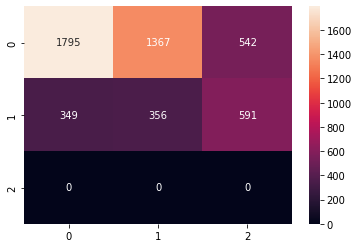

In [ ]:
sns.heatmap(conf, annot=True, fmt="d")